Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


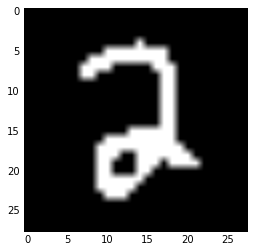

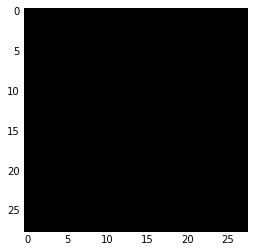

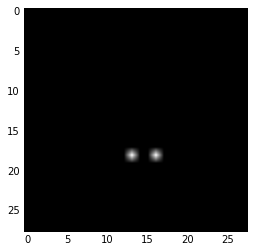

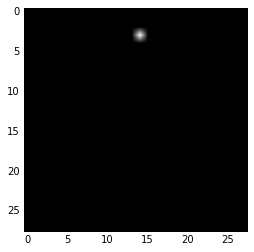

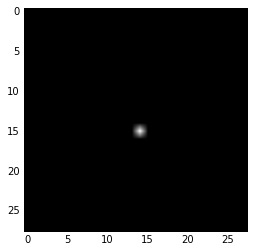

1007


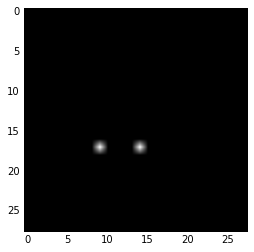

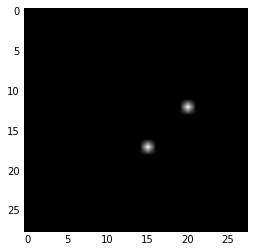

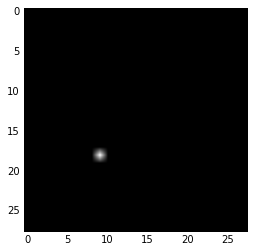

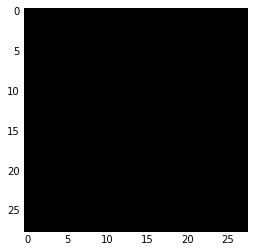

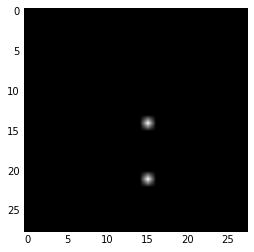

959
0.9174
[ True  True  True ...,  True  True  True]


In [47]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

"""
returns the label for an image
"""
def get_label(a):
    i = 0
    j = 0
    while i != 1:
        if j<len(a):
            if a[j] == 0:
                i = 0
                j += 1
            else:
                i = 1
    return j
    

%matplotlib inline
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

  # Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b


y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

#train the model 
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
array_of_two = []    

for i in range(0,10000):
    if get_label(mnist.train.labels[i]) == 2:
        array_of_two.append(mnist.train.images[i])

for i in range(5):
    first_image = np.array(array_of_two[i], dtype='uint8')
    first_image = first_image.reshape((28,28))
    plt.imshow(first_image, cmap='gray')
    plt.show()
    
print(len(array_of_two))

array_of_six = []    

for i in range(0,10000):
    if get_label(mnist.train.labels[i]) == 6:
        array_of_six.append(mnist.train.images[i])

for i in range(5):
    first_image = np.array(array_of_six[i], dtype='uint8')
    first_image = first_image.reshape((28,28))
    plt.imshow(first_image, cmap='gray')
    plt.show()
    
print(len(array_of_six))
    
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print(sess.run(correct_prediction, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))